In [1]:
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import random
import numpy as np
import csv
from collections import Counter

In [5]:
#File_Paths
CTU_NETFLOW_FILEPATH = "./capture20110812.pcap.netflow.labeled"
COLUMNS = ["Date flow start","Durat","Prot","Src IP Addr","Dst IP Addr","Flags","Tos","Packets Bytes","Flows","Label","Labels"]
HOSTS = ["147.32.84.165","147.32.84.170","147.32.84.134","147.32.84.164","147.32.87.36","147.32.80.9","147.32.87.11"]
fieldnames= ["Date flow start","Durat","Prot","Src IP Addr","Dst IP Addr","Flags","Tos","Packets"," Bytes","Flows","Label"]


# INFECTED HOST TRIAL 

In [6]:
infected_hosts_name_to_ip = {"SARUMAN":  "147.32.84.165" ,    
    "SARUMAN1":  "147.32.84.191" ,
    "SARUMAN2":  "147.32.84.192" ,
    "SARUMAN3":  "147.32.84.193" ,
    "SARUMAN4":  "147.32.84.204" ,
    "SARUMAN5":  "147.32.84.205" ,
    "SARUMAN6":  "147.32.84.206" ,
    "SARUMAN7":  "147.32.84.207" ,
    "SARUMAN8":  "147.32.84.208" ,
    "SARUMAN9":  "147.32.84.209" ,
    }

infected_hosts_ip_to_name = {"147.32.84.165":  "SARUMAN"  ,    
    "147.32.84.191":  "SARUMAN1"  ,
    "147.32.84.192":  "SARUMAN2"  ,
    "147.32.84.193":  "SARUMAN3"  ,
    "147.32.84.204":  "SARUMAN4"  ,
    "147.32.84.205":  "SARUMAN5"  ,
    "147.32.84.206":  "SARUMAN6"  ,
    "147.32.84.207":  "SARUMAN7"  ,
    "147.32.84.208":  "SARUMAN8"  ,
    "147.32.84.209":  "SARUMAN9"}

all_hosts_ip_to_name = {"147.32.84.165":  "SARUMAN"  ,    
    "147.32.84.191":  "SARUMAN1"  ,
    "147.32.84.192":  "SARUMAN2"  ,
    "147.32.84.193":  "SARUMAN3"  ,
    "147.32.84.204":  "SARUMAN4"  ,
    "147.32.84.205":  "SARUMAN5"  ,
    "147.32.84.206":  "SARUMAN6"  ,
    "147.32.84.207":  "SARUMAN7"  ,
    "147.32.84.208":  "SARUMAN8"  ,
    "147.32.84.209":  "SARUMAN9"  ,
    "147.32.84.170" : "Normal1",
    "147.32.84.134" : "Normal2",
    "147.32.84.164" : "Normal3",
    "147.32.87.36" : "Normal4",
    "147.32.80.9" : "Normal5",
    "147.32.87.11" : "Normal6"}

all_hosts_name_to_ip = {"SARUMAN": "147.32.84.165" ,    
    "SARUMAN1":  "147.32.84.191" ,
    "SARUMAN2":  "147.32.84.192" ,
    "SARUMAN3":  "147.32.84.193" ,
    "SARUMAN4":  "147.32.84.204" ,
    "SARUMAN5":  "147.32.84.205" ,
    "SARUMAN6":  "147.32.84.206" ,
    "SARUMAN7":  "147.32.84.207" ,
    "SARUMAN8":  "147.32.84.208" ,
    "SARUMAN9":  "147.32.84.209" ,
    "Normal1" : "147.32.84.170",
    "Normal2" : "147.32.84.134",
    "Normal3" : "147.32.84.164",
    "Normal4" : "147.32.87.36",
    "Normal5" : "147.32.80.9",
    "Normal6" : "147.32.87.11"
   }

hosts = ["SARUMAN","SARUMAN1","SARUMAN2","SARUMAN3","SARUMAN4","SARUMAN5","SARUMAN6","SARUMAN7","SARUMAN8","SARUMAN9","Normal1","Normal2","Normal3","Normal4","Normal5","Normal6"]

CTU_NETFLOW_52_FILEPATH = "./capture20110818.pcap.netflow.labeled"

In [7]:
#Open File
allH_going_packets = {}
allH_comming_packets = {}
for name in all_hosts_name_to_ip:
    allH_going_packets[name]= []
    allH_comming_packets[name]= []

with open(CTU_NETFLOW_52_FILEPATH,"r") as netflow:
    #File is an Argus Unidirectional file created with ra -r so not rly csv. 
    #Let's parse by hand.
    try:
        for i,packet  in enumerate(netflow):
            #skip header
            if i == 0:
                continue

            packet = packet.rstrip('\n')
            split_packet = packet.split("\t")

            if len(split_packet)==1:
                split_packet = packet.split(" ")
                split_packet[0] = split_packet[0]+" "+ split_packet[1]
                del split_packet[1]

            if i%1000000==0:
                print("Packet ",i)

            if "->" in split_packet:
                split_packet.remove("->")

            if "" in split_packet:
                split_packet.remove("")

            if ":" in split_packet[3]: 
                split_packet[3]= split_packet[3].split(":")[0]

            if ":" in split_packet[4]:
                split_packet[4]= split_packet[4].split(":")[0]

            split_packet = [e for e in split_packet if e]

            if len(split_packet)!=11:
                print(i,len(split_packet))

            for ip in all_hosts_ip_to_name:
                if split_packet[4]==ip:
                    name = all_hosts_ip_to_name[ip]
                    allH_comming_packets[name].append(split_packet)
            for ip in all_hosts_ip_to_name:
                if split_packet[3]==ip:
                    name = all_hosts_ip_to_name[ip]
                    allH_going_packets[name].append(split_packet)

            """if i == amount_of_packets:
                break"""
    except Exception as inst:
        print(i)
        print()
        
        

Packet  1000000
Packet  2000000
Packet  3000000
Packet  4000000
Packet  5000000


In [8]:
for host in allH_comming_packets:
    allH_comming_packets[host] = pd.DataFrame(allH_comming_packets[host],columns = fieldnames)
    allH_going_packets[host] = pd.DataFrame(allH_going_packets[host],columns = fieldnames)

In [9]:
for host in np.sort(list(np.sort(allH_comming_packets.keys(),axis=None)[0]),axis=None):
    print(host)
    print(str(host)+ ": "
          ,len(allH_comming_packets[host])
          ,"incoming netflows,"
          ,len(allH_going_packets[host])
          ,"outgoing netflows.\n",
          len(allH_comming_packets[host][allH_comming_packets[host]['Label']=="Botnet"]),
          "Botnets received",
          len(allH_comming_packets[host][allH_comming_packets[host]['Label']=="LEGITIMATE"]),
          "Legitimate received",
          len(allH_going_packets[host][allH_going_packets[host]['Label']=="Botnet"]),
          "Botnets outgoing",
          len(allH_going_packets[host][allH_going_packets[host]['Label']=="LEGITIMATE"]),
          "Legitimate outgoing\n"
        )

Normal1
Normal1:  15088 incoming netflows, 20980 outgoing netflows.
 0 Botnets received 0 Legitimate received 0 Botnets outgoing 20980 Legitimate outgoing

Normal2
Normal2:  5704 incoming netflows, 5916 outgoing netflows.
 0 Botnets received 5704 Legitimate received 0 Botnets outgoing 5916 Legitimate outgoing

Normal3
Normal3:  9654 incoming netflows, 10910 outgoing netflows.
 0 Botnets received 0 Legitimate received 0 Botnets outgoing 10910 Legitimate outgoing

Normal4
Normal4:  4602 incoming netflows, 1858 outgoing netflows.
 0 Botnets received 4079 Legitimate received 0 Botnets outgoing 1390 Legitimate outgoing

Normal5
Normal5:  483657 incoming netflows, 482639 outgoing netflows.
 153 Botnets received 9079 Legitimate received 153 Botnets outgoing 576 Legitimate outgoing

Normal6
Normal6:  707 incoming netflows, 68 outgoing netflows.
 0 Botnets received 0 Legitimate received 0 Botnets outgoing 0 Legitimate outgoing

SARUMAN
SARUMAN:  9637 incoming netflows, 19889 outgoing netflows.


In [10]:
iHost = "SARUMAN"

flags = set()
for host in allH_going_packets:
    flags.update(allH_going_packets[host].Flags.unique())
print("GOING")
print(flags)
print(len(flags))

GOING
{'URPRE', 'ECR', 'FA_', 'PAR', 'A_', 'URP', 'URNU', 'ECO', 'NNS', 'AHA', 'CON', 'MRP', 'URHTOS', 'NNA', 'UNK', 'IRQ', 'NRS', 'SKP', 'DCE', 'ROB', 'FSA_', '___', 'PA_', 'R_', 'FRA_', 'S_', 'FSPA_', 'TRC', '_FSPA', 'FRPA_', 'RED', 'URS', 'SA_', 'URNPRO', 'MHR', 'RPA_', 'RA_', '_FSRA', 'PHO', 'URCUT', 'URHPRO', 'SEC', 'URHU', 'PTB', 'TST', 'DNQ', 'FPA_', 'INT', 'TXD', 'RTA', 'FSRPA_', 'DNP', 'URFIL', 'MAS', 'SPA_', 'RTS', 'WAY', 'NRA', 'URH', 'URISO', 'SRPA_', 'SRC', 'URN', '_FSRPA', '_FSA', 'MRQ', 'UR', 'IAH'}
68


In [11]:
goingFlagsDict=zip(flags,range(len(flags)))
x = list(goingFlagsDict)
goingFlagsDict=zip(flags,range(len(flags)))
goingFlagsTranslator = dict(goingFlagsDict)

In [12]:
flaguis_po = [i[0] for i in x]

# MARKOV CHAINS

 ## Model from Normal host (For Comparison)

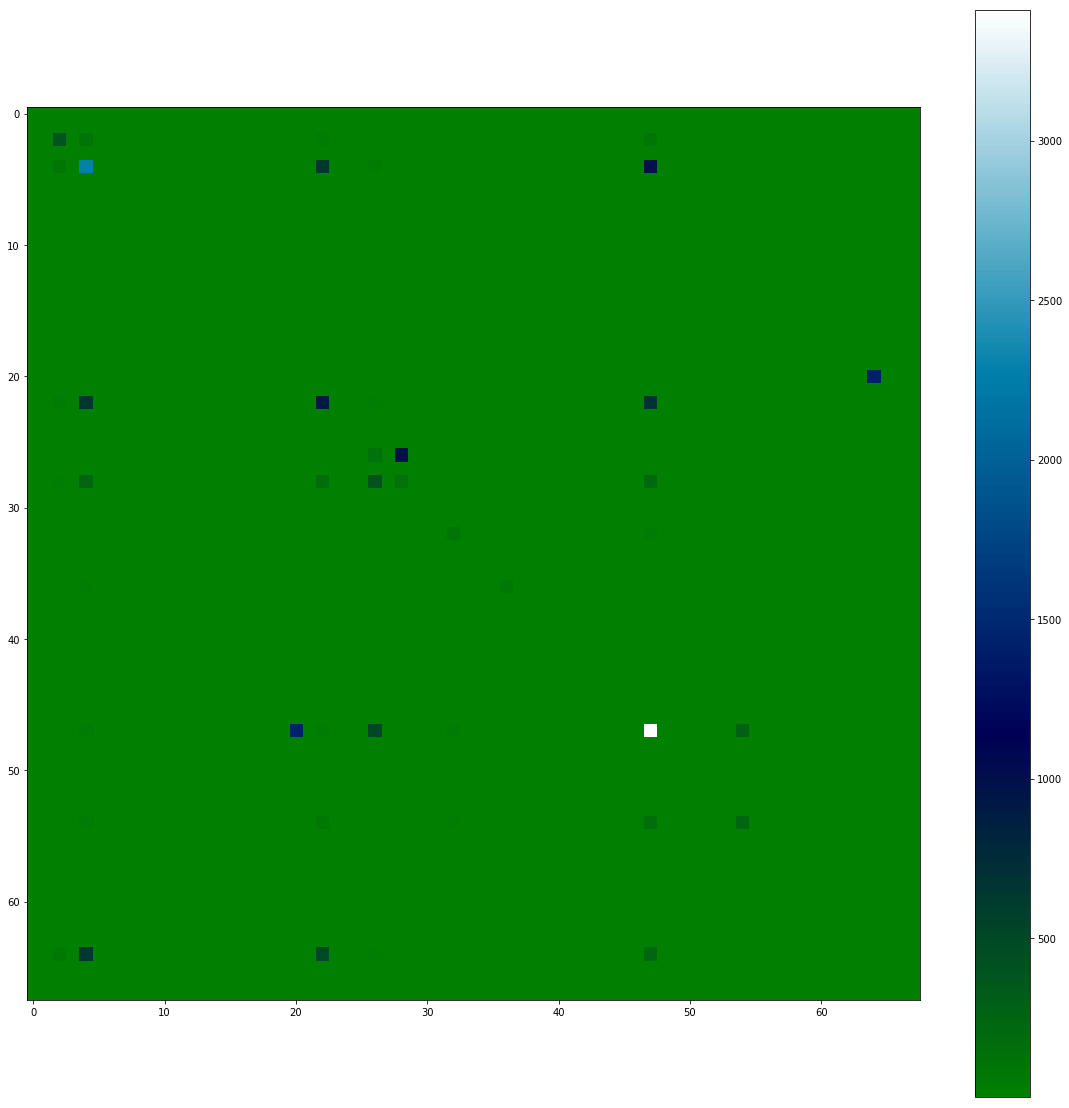

In [31]:
sliding_window_size=10
iHost = "Normal1"
#INITIAL STATES PROBABILITIES
#STATE TRANSITIONS PROBABILITIES
#States
code = 'Flags'
states=set(goingFlagsTranslator.keys())
nr_states = len(states)
initial_states_p = np.zeros(nr_states)
counts = np.zeros((nr_states,nr_states))
transition_p = np.zeros((nr_states,nr_states))
counter= {}

for i in range(0,len(allH_going_packets[iHost])-sliding_window_size,sliding_window_size):
    window = allH_going_packets[iHost][code].iloc[i:i+sliding_window_size]
    initial_states_p[goingFlagsTranslator[window[i]]]+=1
    for j in range(len(window)-1):
        counts[goingFlagsTranslator[window[i+j]],goingFlagsTranslator[window[i+j+1]]]+=1
counts+=1
initial_states_p+=1
initial_states_p /= sum(initial_states_p)
for i in range(nr_states):
    transition_p[i]=counts[i]/sum(counts[i])
trans_p_ln = np.log(transition_p)
initial_states_p_ln = np.log(initial_states_p)
plt.figure(figsize=(20,20))
plt.imshow(np.asmatrix(counts),cmap=plt.cm.ocean)
plt.colorbar()

plt.show()

## Train Model (SARUMAN)

In [32]:
sliding_window_size=10
iHost = "SARUMAN"
#INITIAL STATES PROBABILITIES
#STATE TRANSITIONS PROBABILITIES
#States
code = 'Flags'
states=set(goingFlagsTranslator.keys())
nr_states = len(states)
initial_states_p = np.zeros(nr_states)
counts = np.zeros((nr_states,nr_states))
transition_p = np.zeros((nr_states,nr_states))
counter= {}

for i in range(0,len(allH_going_packets[iHost])-sliding_window_size,sliding_window_size):
    window = allH_going_packets[iHost][code].iloc[i:i+sliding_window_size]
    initial_states_p[goingFlagsTranslator[window[i]]]+=1
    for j in range(len(window)-1):
        counts[goingFlagsTranslator[window[i+j]],goingFlagsTranslator[window[i+j+1]]]+=1
counts+=1
initial_states_p+=1
initial_states_p /= sum(initial_states_p)
for i in range(nr_states):
    transition_p[i]=counts[i]/sum(counts[i])
trans_p_ln = np.log(transition_p)
initial_states_p_ln = np.log(initial_states_p)

In [33]:
for i in range(len(states)):
    print(i,list(flags)[i],trans_p_ln[i])

0 URPRE [-4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771
 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771
 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771
 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771
 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771
 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771
 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771
 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771
 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771
 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771
 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771
 -4.21950771 -4.21950771]
1 ECR [-4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771
 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771 -4.21950771
 -4.2195077

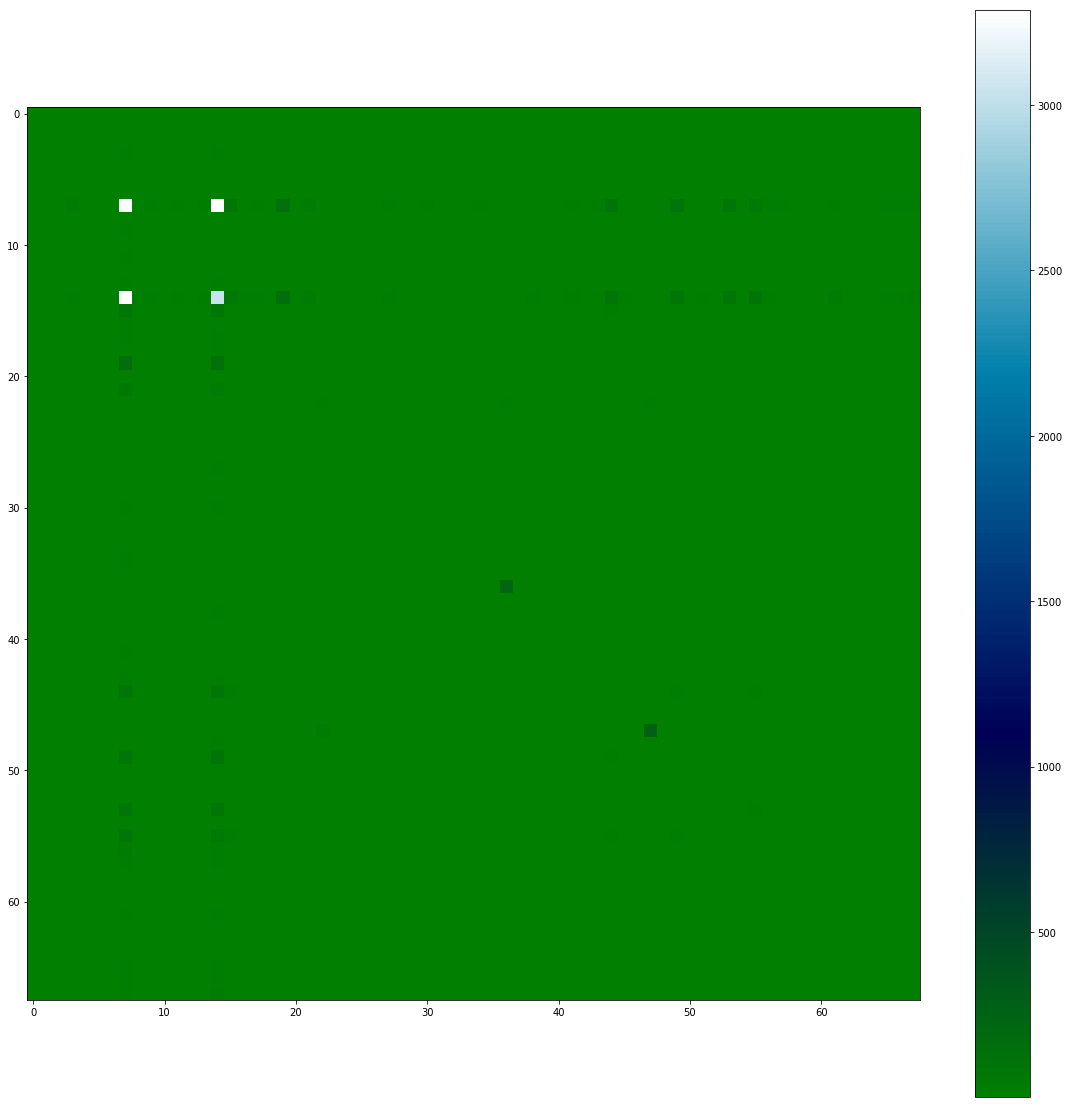

In [34]:
transition_p
trans_p_ln
plt.figure(figsize=(20,20))
plt.imshow(np.asmatrix(counts),cmap=plt.cm.ocean)
plt.colorbar()

plt.show()

## TEST MODEL

In [35]:
hosts_p = {}
for host in allH_going_packets:
    host_p = 0.0
    for i in range(0,len(allH_going_packets[host][code])-sliding_window_size,sliding_window_size):
        window = allH_going_packets[host][code].iloc[i:i+sliding_window_size]
        host_p+=initial_states_p_ln[goingFlagsTranslator[window[i]]]
        #print(trans_p_ln[goingFlagsTranslator[window[i]],goingFlagsTranslator[window[i+1]]])
        host_p += trans_p_ln[goingFlagsTranslator[window[i]],goingFlagsTranslator[window[i+1]]]
    hosts_p[host]=host_p

In [36]:
hosts_p

{'Normal1': -19230.78923505571,
 'Normal2': -4981.809972722709,
 'Normal3': -8839.14822569995,
 'Normal4': -1716.9964045279735,
 'Normal5': -206035.84931652335,
 'Normal6': -71.08815199050697,
 'SARUMAN': -5977.205970905289,
 'SARUMAN1': -6471.534119262282,
 'SARUMAN2': -6367.041018001505,
 'SARUMAN3': -6092.572394972555,
 'SARUMAN4': -6812.669653903576,
 'SARUMAN5': -7347.045259616152,
 'SARUMAN6': -6887.338383497875,
 'SARUMAN7': -6664.3715256798505,
 'SARUMAN8': -6997.9535285064485,
 'SARUMAN9': -5924.146568085689}

In [42]:
results =[]
threshold = abs((hosts_p[iHost]/ np.log(len(allH_going_packets[iHost])))/4)
for host in hosts:
    diff = abs((hosts_p[iHost]/ np.log(len(allH_going_packets[iHost]))) \
            -( hosts_p[host] / np.log(len(allH_going_packets[host]))))
    results.append((host,diff))
    if diff < abs((hosts_p[iHost]/ np.log(len(allH_going_packets[iHost])))/4):
        print(host,"- BOTNET - ",diff,)
    else:
        print(host,"- NOT BOTNET -",diff)


SARUMAN - BOTNET -  0.0
SARUMAN1 - BOTNET -  44.85601106234799
SARUMAN2 - BOTNET -  34.44361713683213
SARUMAN3 - BOTNET -  9.547996908389678
SARUMAN4 - BOTNET -  75.02680853881907
SARUMAN5 - BOTNET -  122.87158078543371
SARUMAN6 - BOTNET -  81.38347671621125
SARUMAN7 - BOTNET -  63.05513031820544
SARUMAN8 - BOTNET -  93.36936667580596
SARUMAN9 - BOTNET -  5.974095717224145
Normal1 - NOT BOTNET - 1328.6003906288179
Normal2 - BOTNET -  30.30157010884909
Normal3 - NOT BOTNET - 346.82332120667445
Normal4 - NOT BOTNET - 375.78103156221584
Normal5 - NOT BOTNET - 15139.636709911738
Normal6 - NOT BOTNET - 587.0374289431526


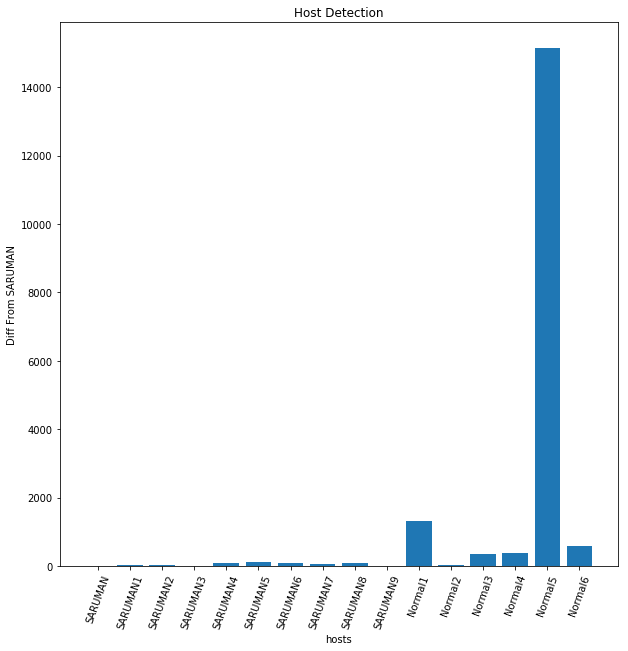

In [48]:
plt.figure(figsize=(10,10))
plt.bar(range(len(results)), [val[1] for val in results], align='center')
plt.xticks(range(len(results)), [val[0] for val in results])
plt.xticks(rotation=70)
plt.xlabel("hosts")
plt.ylabel("Diff From SARUMAN")
plt.title("Host Detection")
plt.show()